# PyCaret for Machine Learning Algorithm Analysis and Hyperparameter Tuning

**Made by: Group 6 in partial completion of Pattern Recognition Class**
 - Timothy Chan
 - Rhyle Nodnylson Guinto
 - Chino Laguda
 - Randall Joseph Pajaro

#### What is PyCaret?
 - PyCaret an open source machine learning library designed to automate evaluation and comparison of machine learning algorithms for an ML project.
 - Apart from Comparison of different Machine Learning Models and their performances on a dataset, PyCaret also offers model tuning. Model Tuning (also known as hyperparameter tuning in some research papers), is a way of getting the best results out of a ML algorithm by making changes to its hyperparameters.

#### Sources:
 - https://machinelearningmastery.com/pycaret-for-machine-learning/
 - PyCaret: https://pycaret.org/
 - How to install PyCaret: it's either **pip install pycaret** or **conda install -c conda-forge pycaret**

**In summary**, instead of running multiple lines of ML algorithms in order to compare its metrics to see which performs best, and instead of running multiple tests in order to get the best parameters for a ML algorithm, PyCaret automates this process by using only a singular function.

## Demonstration using the Customer Happiness Index dataset from the CHI assignment

This part would show a demonstration of what PyCaret can do for a machine learning task/project. First off, we import the essential libraries to view the dataset:

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('dataset-happiness-index.csv')
df.head()

,user_profile,load_profile,subscription_profile,customer_experience_profile,customer_support_engagement_profile,customer_profile,customer_happiness_index
0,93,66,92,63,76,78,Happy
1,70,36,72,43,53,55,Not Happy
2,80,66,90,96,50,76,Happy
3,70,80,82,30,50,62,Neutral
4,73,56,62,53,76,64,Neutral


We drop **customer_profile** because the column **customer_happiness_index** is already the label column with its string values.

In [3]:
df = df.drop(columns=['customer_profile'])
df.head()

,user_profile,load_profile,subscription_profile,customer_experience_profile,customer_support_engagement_profile,customer_happiness_index
0,93,66,92,63,76,Happy
1,70,36,72,43,53,Not Happy
2,80,66,90,96,50,Happy
3,70,80,82,30,50,Neutral
4,73,56,62,53,76,Neutral


For this data, that will be the only cleaning and preprocessing that would be performed. We use **train_test_split** to split the data for training and testing. We use the train data to run the PyCaret model comparison, because we will be using the train data for the actual model building anyway.

In [4]:
# Features
x = df.loc[:,'user_profile':'customer_support_engagement_profile']
# Labels
y = df.loc[:,'customer_happiness_index']

In [5]:
from sklearn.model_selection import train_test_split as tts

x_train, x_test, y_train, y_test = tts(x, y, test_size=0.2, random_state=0)

# This will be our new training data. x_train and y_train combined in one dataframe because x_train and y_train needs to be one dataframe for the PyCaret function, compare_models() to work.
train = x_train.copy()
train[df.columns[-1]] = y_train.copy()
train.head()

,user_profile,load_profile,subscription_profile,customer_experience_profile,customer_support_engagement_profile,customer_happiness_index
582,86,43,87,50,53,Neutral
159,83,73,90,66,30,Neutral
1827,70,60,45,60,43,Not Happy
318,80,66,85,60,53,Neutral
708,70,60,47,40,56,Not Happy


In [6]:
from pycaret.classification import setup
from pycaret.classification import compare_models

In [7]:
grid = setup(data=train, target=train.columns[-1], html=False, silent=True, verbose=False)
best = compare_models()
print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9071,0.9825,0.8083,0.9098,0.9019,0.8207,0.8245,2.321


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9071,0.9825,0.8083,0.9098,0.9019,0.8207,0.8245,2.321
knn,K Neighbors Classifier,0.7614,0.8594,0.5860,0.7542,0.7496,0.5308,0.5364,0.047


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9071,0.9825,0.8083,0.9098,0.9019,0.8207,0.8245,2.321
knn,K Neighbors Classifier,0.7614,0.8594,0.5860,0.7542,0.7496,0.5308,0.5364,0.047
nb,Naive Bayes,0.2154,0.7160,0.5174,0.5564,0.1842,0.1040,0.1557,0.016


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9071,0.9825,0.8083,0.9098,0.9019,0.8207,0.8245,2.321
knn,K Neighbors Classifier,0.7614,0.8594,0.5860,0.7542,0.7496,0.5308,0.5364,0.047
dt,Decision Tree Classifier,0.7561,0.7723,0.6561,0.7558,0.7535,0.5438,0.5457,0.014
nb,Naive Bayes,0.2154,0.7160,0.5174,0.5564,0.1842,0.1040,0.1557,0.016


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9071,0.9825,0.8083,0.9098,0.9019,0.8207,0.8245,2.321
knn,K Neighbors Classifier,0.7614,0.8594,0.5860,0.7542,0.7496,0.5308,0.5364,0.047
dt,Decision Tree Classifier,0.7561,0.7723,0.6561,0.7558,0.7535,0.5438,0.5457,0.014
svm,SVM - Linear Kernel,0.6230,0.0000,0.3749,0.5667,0.5403,0.2441,0.2890,0.036
nb,Naive Bayes,0.2154,0.7160,0.5174,0.5564,0.1842,0.1040,0.1557,0.016


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9071,0.9825,0.8083,0.9098,0.9019,0.8207,0.8245,2.321
knn,K Neighbors Classifier,0.7614,0.8594,0.5860,0.7542,0.7496,0.5308,0.5364,0.047
dt,Decision Tree Classifier,0.7561,0.7723,0.6561,0.7558,0.7535,0.5438,0.5457,0.014
ridge,Ridge Classifier,0.7400,0.0000,0.4237,0.7045,0.6971,0.4423,0.4666,0.052
svm,SVM - Linear Kernel,0.6230,0.0000,0.3749,0.5667,0.5403,0.2441,0.2890,0.036
nb,Naive Bayes,0.2154,0.7160,0.5174,0.5564,0.1842,0.1040,0.1557,0.016


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9071,0.9825,0.8083,0.9098,0.9019,0.8207,0.8245,2.321
rf,Random Forest Classifier,0.8248,0.9505,0.6338,0.8336,0.8114,0.6441,0.6580,0.230
knn,K Neighbors Classifier,0.7614,0.8594,0.5860,0.7542,0.7496,0.5308,0.5364,0.047
dt,Decision Tree Classifier,0.7561,0.7723,0.6561,0.7558,0.7535,0.5438,0.5457,0.014
ridge,Ridge Classifier,0.7400,0.0000,0.4237,0.7045,0.6971,0.4423,0.4666,0.052
svm,SVM - Linear Kernel,0.6230,0.0000,0.3749,0.5667,0.5403,0.2441,0.2890,0.036
nb,Naive Bayes,0.2154,0.7160,0.5174,0.5564,0.1842,0.1040,0.1557,0.016


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9071,0.9825,0.8083,0.9098,0.9019,0.8207,0.8245,2.321
rf,Random Forest Classifier,0.8248,0.9505,0.6338,0.8336,0.8114,0.6441,0.6580,0.230
knn,K Neighbors Classifier,0.7614,0.8594,0.5860,0.7542,0.7496,0.5308,0.5364,0.047
dt,Decision Tree Classifier,0.7561,0.7723,0.6561,0.7558,0.7535,0.5438,0.5457,0.014
ridge,Ridge Classifier,0.7400,0.0000,0.4237,0.7045,0.6971,0.4423,0.4666,0.052
svm,SVM - Linear Kernel,0.6230,0.0000,0.3749,0.5667,0.5403,0.2441,0.2890,0.036
qda,Quadratic Discriminant Analysis,0.3987,0.5228,0.3225,0.5028,0.4160,0.0504,0.0575,0.020
nb,Naive Bayes,0.2154,0.7160,0.5174,0.5564,0.1842,0.1040,0.1557,0.016


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9071,0.9825,0.8083,0.9098,0.9019,0.8207,0.8245,2.321
rf,Random Forest Classifier,0.8248,0.9505,0.6338,0.8336,0.8114,0.6441,0.6580,0.230
knn,K Neighbors Classifier,0.7614,0.8594,0.5860,0.7542,0.7496,0.5308,0.5364,0.047
dt,Decision Tree Classifier,0.7561,0.7723,0.6561,0.7558,0.7535,0.5438,0.5457,0.014
ridge,Ridge Classifier,0.7400,0.0000,0.4237,0.7045,0.6971,0.4423,0.4666,0.052
ada,Ada Boost Classifier,0.6997,0.7062,0.6222,0.7179,0.6961,0.4572,0.4690,0.072
svm,SVM - Linear Kernel,0.6230,0.0000,0.3749,0.5667,0.5403,0.2441,0.2890,0.036
qda,Quadratic Discriminant Analysis,0.3987,0.5228,0.3225,0.5028,0.4160,0.0504,0.0575,0.020
nb,Naive Bayes,0.2154,0.7160,0.5174,0.5564,0.1842,0.1040,0.1557,0.016


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9071,0.9825,0.8083,0.9098,0.9019,0.8207,0.8245,2.321
gbc,Gradient Boosting Classifier,0.8481,0.9476,0.7079,0.8498,0.8403,0.6996,0.7065,0.390
rf,Random Forest Classifier,0.8248,0.9505,0.6338,0.8336,0.8114,0.6441,0.6580,0.230
knn,K Neighbors Classifier,0.7614,0.8594,0.5860,0.7542,0.7496,0.5308,0.5364,0.047
dt,Decision Tree Classifier,0.7561,0.7723,0.6561,0.7558,0.7535,0.5438,0.5457,0.014
ridge,Ridge Classifier,0.7400,0.0000,0.4237,0.7045,0.6971,0.4423,0.4666,0.052
ada,Ada Boost Classifier,0.6997,0.7062,0.6222,0.7179,0.6961,0.4572,0.4690,0.072
svm,SVM - Linear Kernel,0.6230,0.0000,0.3749,0.5667,0.5403,0.2441,0.2890,0.036
qda,Quadratic Discriminant Analysis,0.3987,0.5228,0.3225,0.5028,0.4160,0.0504,0.0575,0.020
nb,Naive Bayes,0.2154,0.7160,0.5174,0.5564,0.1842,0.1040,0.1557,0.016


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9071,0.9825,0.8083,0.9098,0.9019,0.8207,0.8245,2.321
lda,Linear Discriminant Analysis,0.9017,0.9800,0.8064,0.9042,0.8996,0.8186,0.8206,0.070
gbc,Gradient Boosting Classifier,0.8481,0.9476,0.7079,0.8498,0.8403,0.6996,0.7065,0.390
rf,Random Forest Classifier,0.8248,0.9505,0.6338,0.8336,0.8114,0.6441,0.6580,0.230
knn,K Neighbors Classifier,0.7614,0.8594,0.5860,0.7542,0.7496,0.5308,0.5364,0.047
dt,Decision Tree Classifier,0.7561,0.7723,0.6561,0.7558,0.7535,0.5438,0.5457,0.014
ridge,Ridge Classifier,0.7400,0.0000,0.4237,0.7045,0.6971,0.4423,0.4666,0.052
ada,Ada Boost Classifier,0.6997,0.7062,0.6222,0.7179,0.6961,0.4572,0.4690,0.072
svm,SVM - Linear Kernel,0.6230,0.0000,0.3749,0.5667,0.5403,0.2441,0.2890,0.036
qda,Quadratic Discriminant Analysis,0.3987,0.5228,0.3225,0.5028,0.4160,0.0504,0.0575,0.020


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9071,0.9825,0.8083,0.9098,0.9019,0.8207,0.8245,2.321
lda,Linear Discriminant Analysis,0.9017,0.9800,0.8064,0.9042,0.8996,0.8186,0.8206,0.070
gbc,Gradient Boosting Classifier,0.8481,0.9476,0.7079,0.8498,0.8403,0.6996,0.7065,0.390
rf,Random Forest Classifier,0.8248,0.9505,0.6338,0.8336,0.8114,0.6441,0.6580,0.230
et,Extra Trees Classifier,0.8195,0.9349,0.6491,0.8229,0.8070,0.6358,0.6469,0.184
knn,K Neighbors Classifier,0.7614,0.8594,0.5860,0.7542,0.7496,0.5308,0.5364,0.047
dt,Decision Tree Classifier,0.7561,0.7723,0.6561,0.7558,0.7535,0.5438,0.5457,0.014
ridge,Ridge Classifier,0.7400,0.0000,0.4237,0.7045,0.6971,0.4423,0.4666,0.052
ada,Ada Boost Classifier,0.6997,0.7062,0.6222,0.7179,0.6961,0.4572,0.4690,0.072
svm,SVM - Linear Kernel,0.6230,0.0000,0.3749,0.5667,0.5403,0.2441,0.2890,0.036


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9071,0.9825,0.8083,0.9098,0.9019,0.8207,0.8245,2.321
lda,Linear Discriminant Analysis,0.9017,0.9800,0.8064,0.9042,0.8996,0.8186,0.8206,0.070
xgboost,Extreme Gradient Boosting,0.8562,0.9602,0.7482,0.8579,0.8516,0.7230,0.7276,0.949
gbc,Gradient Boosting Classifier,0.8481,0.9476,0.7079,0.8498,0.8403,0.6996,0.7065,0.390
rf,Random Forest Classifier,0.8248,0.9505,0.6338,0.8336,0.8114,0.6441,0.6580,0.230
et,Extra Trees Classifier,0.8195,0.9349,0.6491,0.8229,0.8070,0.6358,0.6469,0.184
knn,K Neighbors Classifier,0.7614,0.8594,0.5860,0.7542,0.7496,0.5308,0.5364,0.047
dt,Decision Tree Classifier,0.7561,0.7723,0.6561,0.7558,0.7535,0.5438,0.5457,0.014
ridge,Ridge Classifier,0.7400,0.0000,0.4237,0.7045,0.6971,0.4423,0.4666,0.052
ada,Ada Boost Classifier,0.6997,0.7062,0.6222,0.7179,0.6961,0.4572,0.4690,0.072


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9071,0.9825,0.8083,0.9098,0.9019,0.8207,0.8245,2.321
lda,Linear Discriminant Analysis,0.9017,0.9800,0.8064,0.9042,0.8996,0.8186,0.8206,0.070
lightgbm,Light Gradient Boosting Machine,0.8633,0.9649,0.7718,0.8641,0.8602,0.7396,0.7422,1.090
xgboost,Extreme Gradient Boosting,0.8562,0.9602,0.7482,0.8579,0.8516,0.7230,0.7276,0.949
gbc,Gradient Boosting Classifier,0.8481,0.9476,0.7079,0.8498,0.8403,0.6996,0.7065,0.390
rf,Random Forest Classifier,0.8248,0.9505,0.6338,0.8336,0.8114,0.6441,0.6580,0.230
et,Extra Trees Classifier,0.8195,0.9349,0.6491,0.8229,0.8070,0.6358,0.6469,0.184
knn,K Neighbors Classifier,0.7614,0.8594,0.5860,0.7542,0.7496,0.5308,0.5364,0.047
dt,Decision Tree Classifier,0.7561,0.7723,0.6561,0.7558,0.7535,0.5438,0.5457,0.014
ridge,Ridge Classifier,0.7400,0.0000,0.4237,0.7045,0.6971,0.4423,0.4666,0.052


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9071,0.9825,0.8083,0.9098,0.9019,0.8207,0.8245,2.321
lda,Linear Discriminant Analysis,0.9017,0.9800,0.8064,0.9042,0.8996,0.8186,0.8206,0.070
catboost,CatBoost Classifier,0.8874,0.9789,0.7849,0.8882,0.8839,0.7840,0.7872,1.598
lightgbm,Light Gradient Boosting Machine,0.8633,0.9649,0.7718,0.8641,0.8602,0.7396,0.7422,1.090
xgboost,Extreme Gradient Boosting,0.8562,0.9602,0.7482,0.8579,0.8516,0.7230,0.7276,0.949
gbc,Gradient Boosting Classifier,0.8481,0.9476,0.7079,0.8498,0.8403,0.6996,0.7065,0.390
rf,Random Forest Classifier,0.8248,0.9505,0.6338,0.8336,0.8114,0.6441,0.6580,0.230
et,Extra Trees Classifier,0.8195,0.9349,0.6491,0.8229,0.8070,0.6358,0.6469,0.184
knn,K Neighbors Classifier,0.7614,0.8594,0.5860,0.7542,0.7496,0.5308,0.5364,0.047
dt,Decision Tree Classifier,0.7561,0.7723,0.6561,0.7558,0.7535,0.5438,0.5457,0.014


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9071,0.9825,0.8083,0.9098,0.9019,0.8207,0.8245,2.321
lda,Linear Discriminant Analysis,0.9017,0.9800,0.8064,0.9042,0.8996,0.8186,0.8206,0.070
catboost,CatBoost Classifier,0.8874,0.9789,0.7849,0.8882,0.8839,0.7840,0.7872,1.598
lightgbm,Light Gradient Boosting Machine,0.8633,0.9649,0.7718,0.8641,0.8602,0.7396,0.7422,1.090
xgboost,Extreme Gradient Boosting,0.8562,0.9602,0.7482,0.8579,0.8516,0.7230,0.7276,0.949
gbc,Gradient Boosting Classifier,0.8481,0.9476,0.7079,0.8498,0.8403,0.6996,0.7065,0.390
rf,Random Forest Classifier,0.8248,0.9505,0.6338,0.8336,0.8114,0.6441,0.6580,0.230
et,Extra Trees Classifier,0.8195,0.9349,0.6491,0.8229,0.8070,0.6358,0.6469,0.184
knn,K Neighbors Classifier,0.7614,0.8594,0.5860,0.7542,0.7496,0.5308,0.5364,0.047
dt,Decision Tree Classifier,0.7561,0.7723,0.6561,0.7558,0.7535,0.5438,0.5457,0.014


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1787, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


As observed in terms of accuracy, Logistic Regression outperforms other algorithms. But let us say that we want to use Decision Tree as our classifier instead of LR and that we want to get the best performance out of it.

In order to achieve this, we can apply **hyperparameter tuning**. We can use PyCaret's built in function to create a simple model for any algorithm choice, or we can use sklearn's functions, and implement it to PyCaret's tune_model() function. For this program, we chose the latte

In [8]:
from sklearn.tree import DecisionTreeClassifier
from pycaret.classification import tune_model

In [9]:
# we kept the number of iterations to 1000. Increasing the number of iterations would have an effect on the resulting metrics
hyperparameter_tuning = tune_model(DecisionTreeClassifier(random_state=0), n_iter=1000, choose_better=True)
print(hyperparameter_tuning)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 3200 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 6000 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done 9600 tasks      | elapsed:   36.8s
[Parallel(n_jobs=-1)]: Done 9985 out of 10000 | elapsed:   38.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 10000 out of 10000 | elapsed:   38.3s finished


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7500,0.8268,0.6709,0.7497,0.7470,0.5160,0.5173
1,0.8036,0.8569,0.7353,0.8015,0.8004,0.6164,0.6187
2,0.7768,0.8964,0.6446,0.7713,0.7702,0.5628,0.5663
3,0.7768,0.8352,0.6568,0.7720,0.7738,0.5726,0.5734
4,0.7946,0.8814,0.7465,0.8029,0.7967,0.6225,0.6236
5,0.7768,0.8171,0.6748,0.7712,0.7721,0.5740,0.5761
6,0.8125,0.8815,0.6952,0.8168,0.8066,0.6369,0.6421
7,0.7232,0.7828,0.5827,0.7219,0.7184,0.4888,0.4908
8,0.7589,0.8074,0.6598,0.7579,0.7557,0.5387,0.5407
9,0.7838,0.8746,0.7027,0.7890,0.7833,0.5915,0.5923


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=15, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0005, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


We now use the resulting hyperparameters for our model.

## Classification Model using Hyperparameter Tuned DT

In [10]:
from sklearn.metrics import classification_report

Without hyperparameters

In [11]:
dt = DecisionTreeClassifier(random_state=0)
model = dt.fit(x_train, y_train)
model.score(x_test, y_test)

pred = model.predict(x_test)

print(classification_report(y_test, pred))

                precision    recall  f1-score   support

         Happy       0.69      0.58      0.63        31
       Neutral       0.85      0.93      0.89       246
     Not Happy       0.85      0.72      0.78       106
Not Very Happy       0.82      0.82      0.82        17

      accuracy                           0.84       400
     macro avg       0.81      0.76      0.78       400
  weighted avg       0.84      0.84      0.84       400



With hyperparameters

In [15]:
dt = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=15, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0005, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')
model = dt.fit(x_train, y_train)
model.score(x_test, y_test)

pred = model.predict(x_test)

print(classification_report(y_test, pred))

                precision    recall  f1-score   support

         Happy       0.96      0.74      0.84        31
       Neutral       0.88      0.97      0.92       246
     Not Happy       0.84      0.76      0.80       106
Not Very Happy       0.90      0.53      0.67        17

      accuracy                           0.88       400
     macro avg       0.90      0.75      0.81       400
  weighted avg       0.88      0.88      0.87       400



As we can see, there's a difference when we view the metrics for DT Classifier without tuned hyperparameters and DT Classifier with tuned hyperparameters.

# Feature Importance Visualizations

#### Feature Importance

In [19]:
from matplotlib import pyplot as plt

In [24]:
importance = model.feature_importances_

f = []
s = []

for i,v in enumerate(importance):
    f.append(x_train.columns[i])
    s.append(v*100)

In [27]:
features = pd.DataFrame()
features['Features'] = f
features['Importance_Scores'] = s
features

,Features,Importance_Scores
0,user_profile,9.981607
1,load_profile,16.655695
2,subscription_profile,28.253825
3,customer_experience_profile,25.422574
4,customer_support_engagement_profile,19.686299


<BarContainer object of 5 artists>

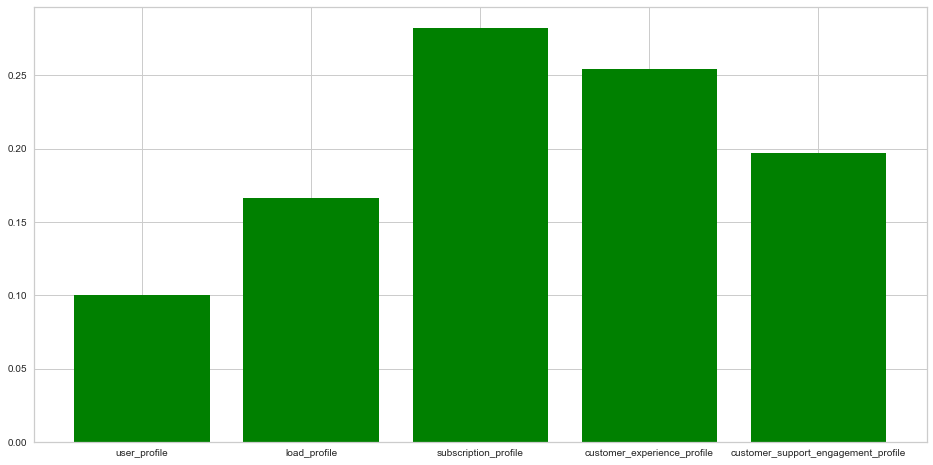

In [38]:
plt.rcParams['figure.figsize'] = (16,8)
plt.bar(f, importance, color='green')

We can infer from this graph that subscription_profile scores contribute more in classifying a customer's happiness index and that it is the most important feature.